In [18]:
import pandas as pd
import numpy as np
import datetime
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
import sklearn.metrics as metrics

In [2]:
curated_df=pd.read_pickle("C:/Users/Usuario/LAU/Diplomatura_Ciencia_Datos/Mentoria/Entregas/df_curated_per_hour.pkl")

In [3]:
curated_df

,id_equipo,nombre_producto,equipo_producto,capacidad,industria,volumen_escl,consumo_escl
timestamp,,,,,,,
2021-01-18 17:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.373230,0.003682
2021-01-18 18:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.368941,0.000911
2021-01-18 19:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.368387,0.000900
2021-01-18 20:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.367487,0.000957
2021-01-18 21:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.366531,0.001160
...,...,...,...,...,...,...,...
2021-02-26 13:00:00,959,Producto 1,959-Producto 1,1033.0,Distributor,3.861568,0.000000
2021-02-26 14:00:00,959,Producto 1,959-Producto 1,1033.0,Distributor,3.861568,0.000000
2021-02-26 15:00:00,959,Producto 1,959-Producto 1,1033.0,Distributor,3.862536,0.000000


In [4]:
curated_df.id_equipo.unique()

array(['159', '2', '210', '220', '227', '248', '299', '346', '356', '357',
       '421', '429', '431', '433', '439', '441', '453', '455', '459',
       '477', '479', '480', '484', '486', '495', '501', '508', '515',
       '520', '531', '533', '537', '540', '541', '543', '550', '551',
       '553', '554', '569', '578', '593', '595', '600', '618', '626',
       '627', '629', '636', '637', '638', '642', '643', '644', '648',
       '654', '661', '665', '677', '679', '680', '681', '682', '683',
       '686', '687', '696', '697', '698', '704', '715', '717', '719',
       '720', '723', '724', '725', '727', '729', '730', '731', '732',
       '733', '734', '735', '737', '740', '741', '742', '743', '745',
       '746', '747', '751', '759', '763', '764', '765', '769', '770',
       '771', '783', '788', '794', '799', '8', '800', '801', '806', '812',
       '813', '814', '816', '818', '823', '827', '828', '830', '831',
       '838', '841', '842', '849', '851', '853', '854', '867', '869',
       '87

In [5]:
co_ss=curated_df[curated_df["industria"]=="Service Station"]

In [6]:
co_ss

,id_equipo,nombre_producto,equipo_producto,capacidad,industria,volumen_escl,consumo_escl
timestamp,,,,,,,
2021-01-18 17:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.373230,0.003682
2021-01-18 18:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.368941,0.000911
2021-01-18 19:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.368387,0.000900
2021-01-18 20:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.367487,0.000957
2021-01-18 21:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.366531,0.001160
...,...,...,...,...,...,...,...
2021-03-31 19:00:00,900,VP Nafta,900-VP Nafta,20750.0,Service Station,0.893244,0.010990
2021-03-31 20:00:00,900,VP Nafta,900-VP Nafta,20750.0,Service Station,0.883181,0.010970
2021-03-31 21:00:00,900,VP Nafta,900-VP Nafta,20750.0,Service Station,0.870602,0.011596


In [7]:
co_ss.nombre_producto.unique()

array(['Formula Diesel', 'Nafta Super', 'V-Power Diesel', 'V-Power Nafta',
       'D500', 'Infinia Diesel', 'Infinia Nafta', 'Euro Diesel',
       'Formula', 'Super', 'VP-Diesel', 'VP-Nafta', 'Nafta V-Power',
       'V-Power Nitro', 'VP Nafta', 'Diesel 500', 'Product 2', 'Diesel',
       'Quantum Diesel', 'Quantum Nafta', 'Euro', 'Premium', 'VP Diesel'],
      dtype=object)

In [6]:
co_ss_FD=co_ss[co_ss["nombre_producto"]== "Formula Diesel"] 

In [9]:
co_ss_FD

,id_equipo,nombre_producto,equipo_producto,capacidad,industria,volumen_escl,consumo_escl
timestamp,,,,,,,
2021-01-18 17:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.373230,0.003682
2021-01-18 18:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.368941,0.000911
2021-01-18 19:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.368387,0.000900
2021-01-18 20:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.367487,0.000957
2021-01-18 21:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.366531,0.001160
...,...,...,...,...,...,...,...
2021-03-31 19:00:00,900,Formula Diesel,900-Formula Diesel,63250.0,Service Station,0.568822,0.005642
2021-03-31 20:00:00,900,Formula Diesel,900-Formula Diesel,63250.0,Service Station,0.560571,0.002733
2021-03-31 21:00:00,900,Formula Diesel,900-Formula Diesel,63250.0,Service Station,0.560348,0.000842


In [10]:
co_ss_FD.id_equipo.unique()

array(['159', '429', '477', '495', '841', '900'], dtype=object)

In [11]:
len(co_ss_FD[co_ss_FD["id_equipo"]=="477"])

2160

In [12]:
len(co_ss_FD[co_ss_FD["id_equipo"]=="495"])

2159

In [13]:
len(co_ss_FD[co_ss_FD["id_equipo"]=="841"])

1669

In [14]:
len(co_ss_FD[co_ss_FD["id_equipo"]=="900"])

2160

In [15]:
len(co_ss_FD[co_ss_FD["id_equipo"]=="159"])

1735

In [16]:
len(co_ss_FD[co_ss_FD["id_equipo"]=="429"])

2160

In [7]:
co_ss_FD= co_ss_FD[co_ss_FD["id_equipo"]!="841"] ##todos menos el que tiene menos observaciones

In [18]:
co_ss_FD.id_equipo.unique()

array(['159', '429', '477', '495', '900'], dtype=object)

In [8]:
co_ss_FD=co_ss_FD.loc["2021-03-15 00:00:00":]

In [20]:
co_ss_FD

,id_equipo,nombre_producto,equipo_producto,capacidad,industria,volumen_escl,consumo_escl
timestamp,,,,,,,
2021-03-15 00:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377464,0.000000
2021-03-15 01:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377464,0.000280
2021-03-15 02:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377184,0.000000
2021-03-15 03:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377184,0.000000
2021-03-15 04:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377184,0.000000
...,...,...,...,...,...,...,...
2021-03-31 19:00:00,900,Formula Diesel,900-Formula Diesel,63250.0,Service Station,0.568822,0.005642
2021-03-31 20:00:00,900,Formula Diesel,900-Formula Diesel,63250.0,Service Station,0.560571,0.002733
2021-03-31 21:00:00,900,Formula Diesel,900-Formula Diesel,63250.0,Service Station,0.560348,0.000842


In [21]:
co_ss_FD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2039 entries, 2021-03-15 00:00:00 to 2021-03-31 23:00:00
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_equipo        2039 non-null   object 
 1   nombre_producto  2039 non-null   object 
 2   equipo_producto  2039 non-null   object 
 3   capacidad        2039 non-null   float32
 4   industria        2039 non-null   object 
 5   volumen_escl     2039 non-null   float32
 6   consumo_escl     2039 non-null   float32
dtypes: float32(3), object(4)
memory usage: 103.5+ KB


In [22]:
y=co_ss_FD["consumo_escl"]

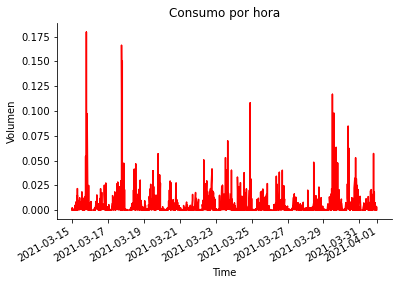

In [23]:
fig, ax= plt.subplots();#figsize=(9,6))
y.plot(color="red")
ax.set_xlabel('Time')
ax.set_ylabel('Volumen')
ax.set_title('Consumo por hora')
sns.despine()
plt.show()

In [9]:
data_consumption = co_ss_FD[['equipo_producto', 'consumo_escl']]
data_consumption = data_consumption.sort_index()
data_consumption.loc[:,'consumo_accum'] = data_consumption.groupby('equipo_producto')['consumo_escl'].transform("cumsum")
data_consumption["ordinal_datetime"]=data_consumption.groupby("equipo_producto").transform("cumcount")
data_consumption = data_consumption.dropna()

In [10]:
data_consumption

,equipo_producto,consumo_escl,consumo_accum,ordinal_datetime
timestamp,,,,
2021-03-15 00:00:00,159-Formula Diesel,0.000000,0.000000,0
2021-03-15 00:00:00,429-Formula Diesel,0.001479,0.001479,0
2021-03-15 00:00:00,900-Formula Diesel,0.000035,0.000035,0
2021-03-15 00:00:00,477-Formula Diesel,0.002121,0.002121,0
2021-03-15 00:00:00,495-Formula Diesel,0.000000,0.000000,0
...,...,...,...,...
2021-03-31 22:00:00,159-Formula Diesel,0.000000,0.583962,406
2021-03-31 23:00:00,429-Formula Diesel,0.000228,0.743130,407
2021-03-31 23:00:00,159-Formula Diesel,0.000249,0.584211,407


In [28]:
y_=data_consumption["consumo_accum"]

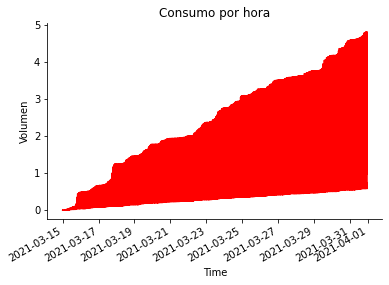

In [29]:
fig, ax= plt.subplots();#figsize=(9,6))
y_.plot(color="red")
ax.set_xlabel('Time')
ax.set_ylabel('Volumen')
ax.set_title('Consumo por hora')
sns.despine()
plt.show()

In [13]:
        # Train
        X_train = data_consumption['2021-03-15':'2021-03-28']['ordinal_datetime'].values.reshape(-1, 1)
        y_train = data_consumption.loc['2021-03-15':'2021-03-28', 'consumo_accum']

        # Test
        X_test = data_consumption['2021-03-28':]['ordinal_datetime'].values.reshape(-1, 1)
        y_test = data_consumption.loc['2021-03-28':, 'consumo_accum']

LR: 0.004189 (0.013239)
SGD: -57394692805282651365703680.000000 (72797106948767532690964480.000000)
NN: 0.004877 (0.013126)
KNN: -0.040184 (0.054296)
DT: -0.040184 (0.054296)
RF: -0.023941 (0.031709)
SVR: -0.413643 (0.062441)


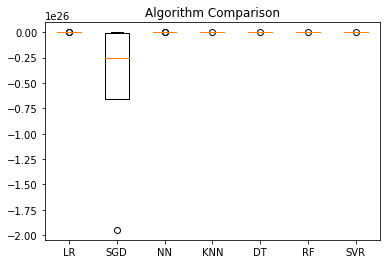

In [14]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('SGD', SGDRegressor()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('DT', DecisionTreeRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=5)
    
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

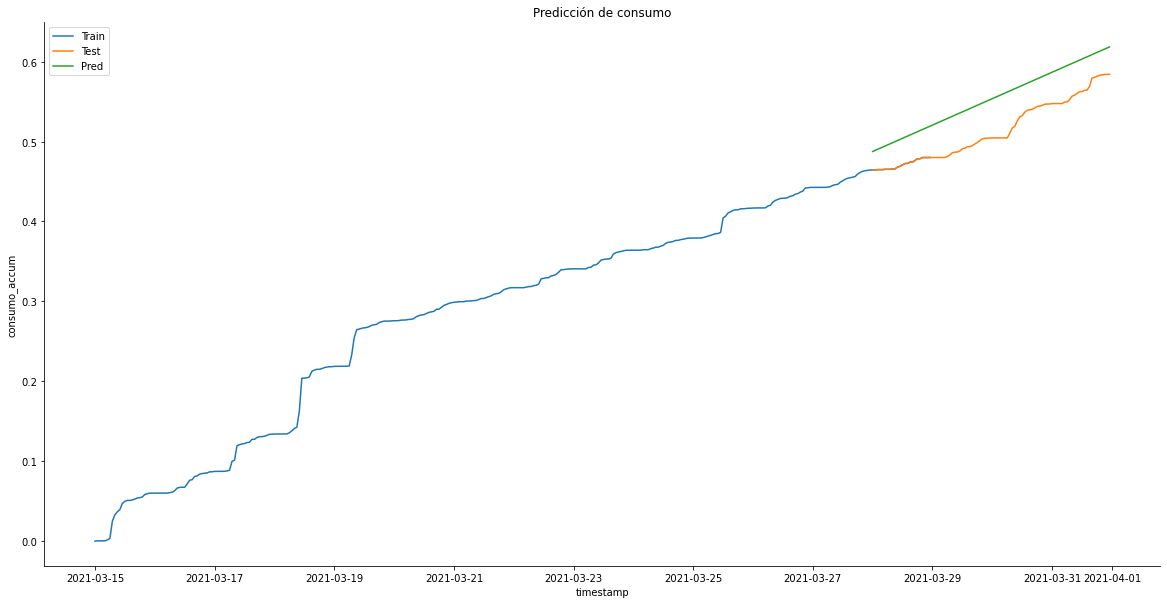

In [16]:
model = LinearRegression()
data_site_159 = data_consumption[data_consumption["equipo_producto"] == "159-Formula Diesel"]
# Train
X_train = data_site_159['2021-03-15':'2021-03-28']['ordinal_datetime'].values.reshape(-1, 1)
y_train = data_site_159.loc['2021-03-15':'2021-03-28', 'consumo_accum']

# Test
X_test = data_site_159['2021-03-28':]['ordinal_datetime'].values.reshape(-1, 1)
y_test = data_site_159.loc['2021-03-28':, 'consumo_accum']

# Predict
model.fit(X_train, y_train)
pred = model.predict(X_test)
y_test_pred = pd.Series(pred, index=y_test.index)

# Plot
fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=y_train, label='Train').set_title("Predicción de consumo")
sns.lineplot(data=y_test, label='Test')
sns.lineplot(data=y_test_pred, label='Pred')
sns.despine()

In [19]:
explained_variance=metrics.explained_variance_score(y_test, y_test_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_pred) 
mse=metrics.mean_squared_error(y_test, y_test_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_test_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_test_pred)
r2=metrics.r2_score(y_test, y_test_pred)
print('explained_variance: ', round(explained_variance,4))    
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('RMSE: ', round(np.sqrt(mse),4))
print('r2: ', round(r2,4))

explained_variance:  0.9611
MAE:  0.0399
MSE:  0.0016
mean_squared_log_error:  0.0007
RMSE:  0.0405
r2:  -0.154


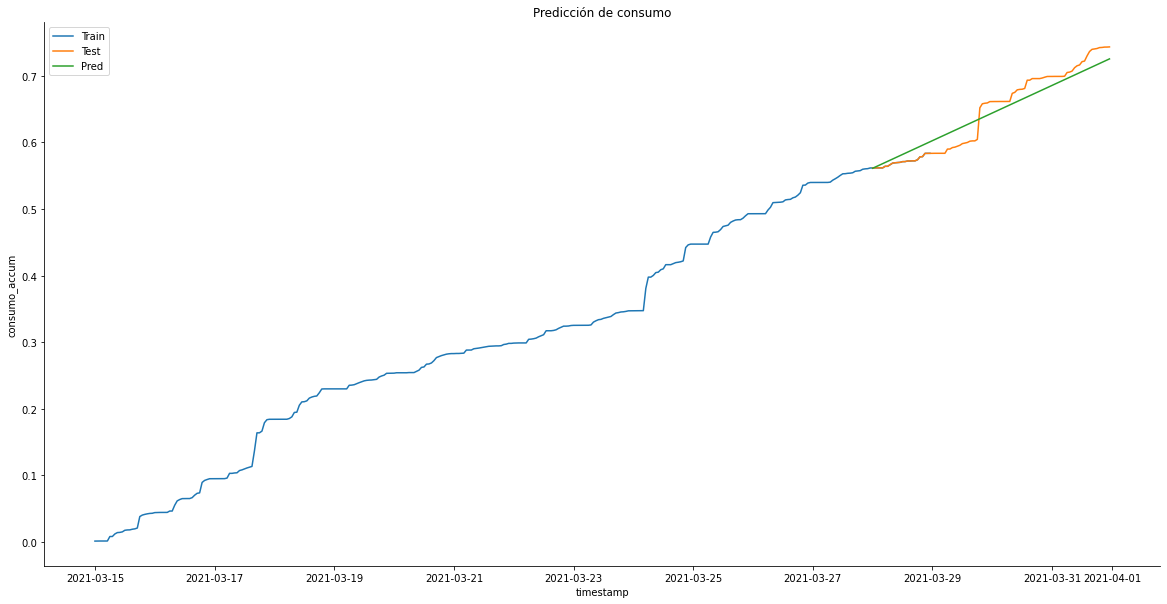

In [20]:
model = LinearRegression()
data_site_429 = data_consumption[data_consumption["equipo_producto"] == "429-Formula Diesel"]
# Train
X_train = data_site_429['2021-03-15':'2021-03-28']['ordinal_datetime'].values.reshape(-1, 1)
y_train = data_site_429.loc['2021-03-15':'2021-03-28', 'consumo_accum']

# Test
X_test = data_site_429['2021-03-28':]['ordinal_datetime'].values.reshape(-1, 1)
y_test = data_site_429.loc['2021-03-28':, 'consumo_accum']

# Predict
model.fit(X_train, y_train)
pred = model.predict(X_test)
y_test_pred = pd.Series(pred, index=y_test.index)

# Plot
fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=y_train, label='Train').set_title("Predicción de consumo")
sns.lineplot(data=y_test, label='Test')
sns.lineplot(data=y_test_pred, label='Pred')
sns.despine()

In [21]:
explained_variance=metrics.explained_variance_score(y_test, y_test_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_pred) 
mse=metrics.mean_squared_error(y_test, y_test_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_test_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_test_pred)
r2=metrics.r2_score(y_test, y_test_pred)
print('explained_variance: ', round(explained_variance,4))    
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('RMSE: ', round(np.sqrt(mse),4))
print('r2: ', round(r2,4))

explained_variance:  0.9162
MAE:  0.0165
MSE:  0.0003
mean_squared_log_error:  0.0001
RMSE:  0.018
r2:  0.9158


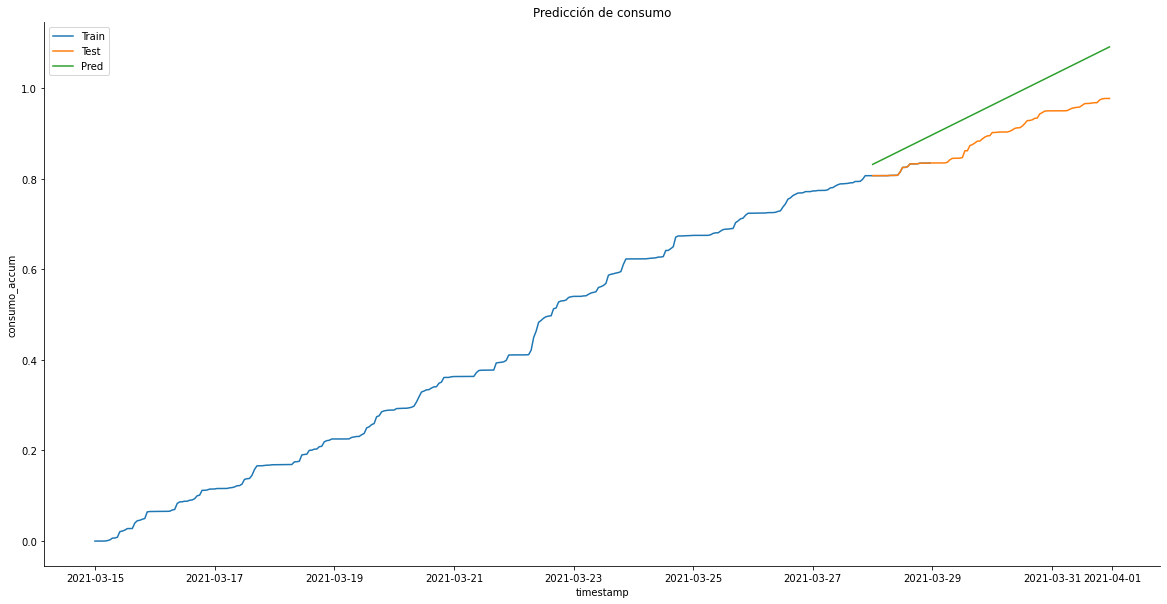

In [22]:
model = LinearRegression()
data_site_900 = data_consumption[data_consumption["equipo_producto"] == "900-Formula Diesel"]
# Train
X_train = data_site_900['2021-03-15':'2021-03-28']['ordinal_datetime'].values.reshape(-1, 1)
y_train = data_site_900.loc['2021-03-15':'2021-03-28', 'consumo_accum']

# Test
X_test = data_site_900['2021-03-28':]['ordinal_datetime'].values.reshape(-1, 1)
y_test = data_site_900.loc['2021-03-28':, 'consumo_accum']

# Predict
model.fit(X_train, y_train)
pred = model.predict(X_test)
y_test_pred = pd.Series(pred, index=y_test.index)

# Plot
fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=y_train, label='Train').set_title("Predicción de consumo")
sns.lineplot(data=y_test, label='Test')
sns.lineplot(data=y_test_pred, label='Pred')
sns.despine()

In [23]:
explained_variance=metrics.explained_variance_score(y_test, y_test_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_pred) 
mse=metrics.mean_squared_error(y_test, y_test_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_test_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_test_pred)
r2=metrics.r2_score(y_test, y_test_pred)
print('explained_variance: ', round(explained_variance,4))    
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('RMSE: ', round(np.sqrt(mse),4))
print('r2: ', round(r2,4))

explained_variance:  0.8668
MAE:  0.0712
MSE:  0.0055
mean_squared_log_error:  0.0014
RMSE:  0.0742
r2:  -0.6922


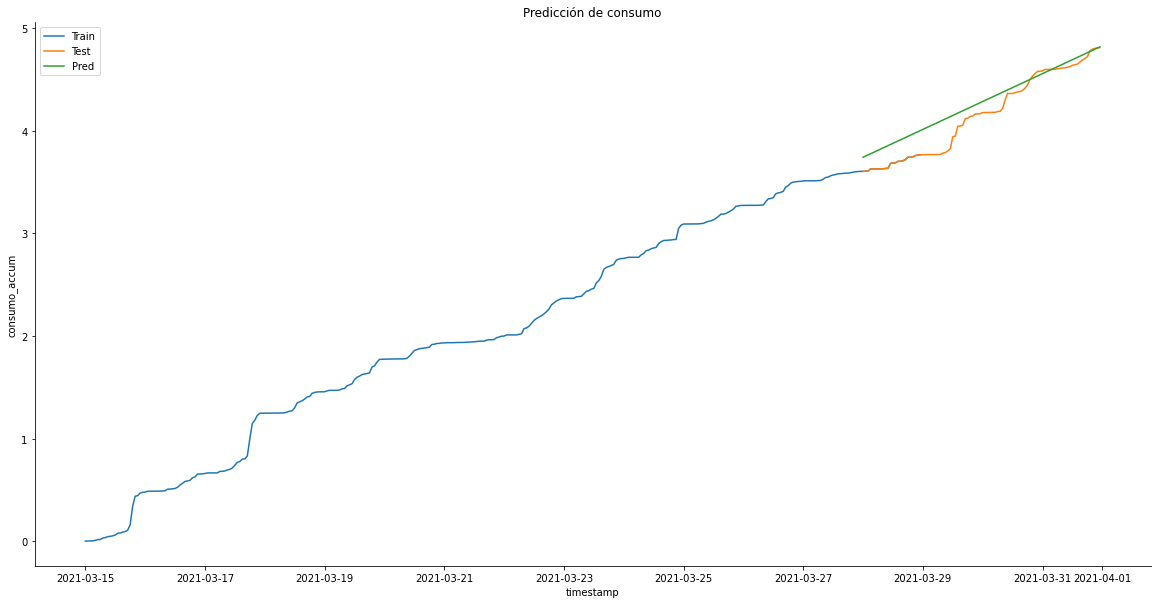

In [24]:
model = LinearRegression()
data_site_477 = data_consumption[data_consumption["equipo_producto"] == "477-Formula Diesel"]
# Train
X_train = data_site_477['2021-03-15':'2021-03-28']['ordinal_datetime'].values.reshape(-1, 1)
y_train = data_site_477.loc['2021-03-15':'2021-03-28', 'consumo_accum']

# Test
X_test = data_site_477['2021-03-28':]['ordinal_datetime'].values.reshape(-1, 1)
y_test = data_site_477.loc['2021-03-28':, 'consumo_accum']

# Predict
model.fit(X_train, y_train)
pred = model.predict(X_test)
y_test_pred = pd.Series(pred, index=y_test.index)

# Plot
fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=y_train, label='Train').set_title("Predicción de consumo")
sns.lineplot(data=y_test, label='Test')
sns.lineplot(data=y_test_pred, label='Pred')
sns.despine()

In [25]:
explained_variance=metrics.explained_variance_score(y_test, y_test_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_pred) 
mse=metrics.mean_squared_error(y_test, y_test_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_test_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_test_pred)
r2=metrics.r2_score(y_test, y_test_pred)
print('explained_variance: ', round(explained_variance,4))    
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('RMSE: ', round(np.sqrt(mse),4))
print('r2: ', round(r2,4))

explained_variance:  0.9358
MAE:  0.1303
MSE:  0.0257
mean_squared_log_error:  0.0011
RMSE:  0.1604
r2:  0.836


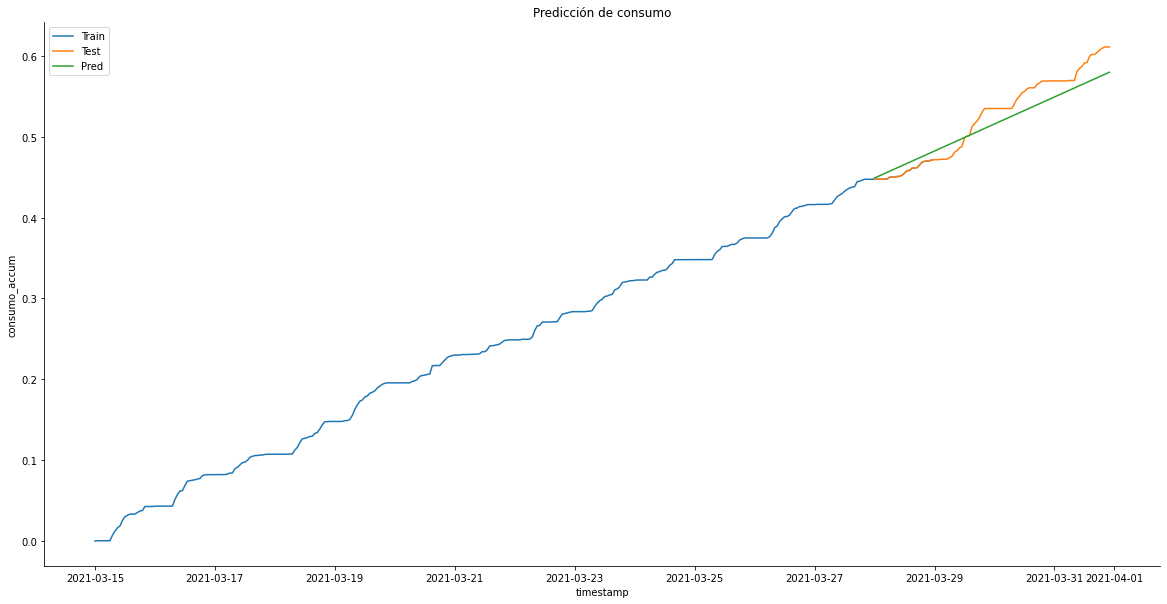

In [26]:
model = LinearRegression()
data_site_495 = data_consumption[data_consumption["equipo_producto"] == "495-Formula Diesel"]
# Train
X_train = data_site_495['2021-03-15':'2021-03-28']['ordinal_datetime'].values.reshape(-1, 1)
y_train = data_site_495.loc['2021-03-15':'2021-03-28', 'consumo_accum']

# Test
X_test = data_site_495['2021-03-28':]['ordinal_datetime'].values.reshape(-1, 1)
y_test = data_site_495.loc['2021-03-28':, 'consumo_accum']

# Predict
model.fit(X_train, y_train)
pred = model.predict(X_test)
y_test_pred = pd.Series(pred, index=y_test.index)

# Plot
fig = plt.figure(figsize=(20, 10))
sns.lineplot(data=y_train, label='Train').set_title("Predicción de consumo")
sns.lineplot(data=y_test, label='Test')
sns.lineplot(data=y_test_pred, label='Pred')
sns.despine()

In [27]:
explained_variance=metrics.explained_variance_score(y_test, y_test_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_pred) 
mse=metrics.mean_squared_error(y_test, y_test_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_test_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_test_pred)
r2=metrics.r2_score(y_test, y_test_pred)
print('explained_variance: ', round(explained_variance,4))    
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('RMSE: ', round(np.sqrt(mse),4))
print('r2: ', round(r2,4))

explained_variance:  0.9075
MAE:  0.0162
MSE:  0.0003
mean_squared_log_error:  0.0001
RMSE:  0.0181
r2:  0.881


In [8]:
co_ss_FD["consumo_hour_before"]=co_ss_FD["consumo_escl"].shift()

In [9]:
co_ss_FD["diff_consumo"]=co_ss_FD["consumo_escl"].diff()

In [10]:
co_ss_FD["consumo_acumulado"]=co_ss_FD["consumo_escl"].cumsum()

In [11]:
co_ss_FD["datetime"]=co_ss_FD.index

In [12]:
co_ss_FD["ordinal_datetime"]=co_ss_FD["datetime"].map(dt.datetime.toordinal)

In [13]:
co_ss_FD

,id_equipo,nombre_producto,equipo_producto,capacidad,industria,volumen_escl,consumo_escl,consumo_hour_before,diff_consumo,consumo_acumulado,datetime,ordinal_datetime
timestamp,,,,,,,,,,,,
2021-03-15 00:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377464,0.000000,NaN,NaN,0.000000,2021-03-15 00:00:00,737864
2021-03-15 01:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377464,0.000280,0.000000,0.000280,0.000280,2021-03-15 01:00:00,737864
2021-03-15 02:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377184,0.000000,0.000280,-0.000280,0.000280,2021-03-15 02:00:00,737864
2021-03-15 03:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377184,0.000000,0.000000,0.000000,0.000280,2021-03-15 03:00:00,737864
2021-03-15 04:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377184,0.000000,0.000000,0.000000,0.000280,2021-03-15 04:00:00,737864
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31 19:00:00,900,Formula Diesel,900-Formula Diesel,63250.0,Service Station,0.568822,0.005642,0.000109,0.005533,7.721361,2021-03-31 19:00:00,737880
2021-03-31 20:00:00,900,Formula Diesel,900-Formula Diesel,63250.0,Service Station,0.560571,0.002733,0.005642,-0.002909,7.724094,2021-03-31 20:00:00,737880
2021-03-31 21:00:00,900,Formula Diesel,900-Formula Diesel,63250.0,Service Station,0.560348,0.000842,0.002733,-0.001891,7.724936,2021-03-31 21:00:00,737880


In [14]:
co_ss_FD=co_ss_FD.dropna()

In [33]:
co_ss_FD.head()

,id_equipo,nombre_producto,equipo_producto,capacidad,industria,volumen_escl,consumo_escl,consumo_hour_before,diff_consumo,consumo_acumulado,datetime,ordinal_datetime
timestamp,,,,,,,,,,,,
2021-03-15 01:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377464,0.000280,0.00000,0.000280,0.000280,2021-03-15 01:00:00,737864
2021-03-15 02:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377184,0.000000,0.00028,-0.000280,0.000280,2021-03-15 02:00:00,737864
2021-03-15 03:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377184,0.000000,0.00000,0.000000,0.000280,2021-03-15 03:00:00,737864
2021-03-15 04:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377184,0.000000,0.00000,0.000000,0.000280,2021-03-15 04:00:00,737864
2021-03-15 05:00:00,159,Formula Diesel,159-Formula Diesel,21327.0,Service Station,0.377184,0.001238,0.00000,0.001238,0.001518,2021-03-15 05:00:00,737864


### Dividir el dataframe en train and test

In [15]:
X_train= co_ss_FD.loc[: "2021-03-27 23:00", ["consumo_hour_before", "diff_consumo"]]

In [16]:
y_train=co_ss_FD.loc[:"2021-03-27 23:00", "consumo_escl"]

In [17]:
X_test= co_ss_FD.loc["2021-03-28 00:00": , ["consumo_hour_before", "diff_consumo"]]

In [18]:
y_test= co_ss_FD.loc["2021-03-28 00:00":, "consumo_escl"]

In [11]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

LR: 1.000000 (0.000000)
SGD: -0.440509 (0.745781)
NN: 0.246001 (0.472674)
KNN: 0.801043 (0.277942)
DT: 0.736150 (0.237087)
RF: 0.799452 (0.259744)
SVR: -384.551178 (543.446089)


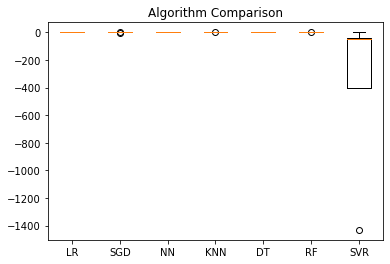

In [20]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('SGD', SGDRegressor()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('DT', DecisionTreeRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=5)
    
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [21]:
import sklearn.metrics as metrics
def regression_results(y_test, y_pred_test):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_pred_test)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred_test) 
    mse=metrics.mean_squared_error(y_test, y_pred_test) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred_test)
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred_test)
    r2=metrics.r2_score(y_test, y_pred_test)
    print('explained_variance: ', round(explained_variance,4))    
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('r2: ', round(r2,4))

In [22]:
from sklearn.model_selection import GridSearchCV
RF = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=RF, cv=tscv, param_grid=param_search, scoring = "r2")
gsearch.fit(X_train, y_train)
best_score_RF = gsearch.best_score_
best_model_RF = gsearch.best_estimator_

In [23]:
y_pred_test=best_model_RF.predict(X_test)

In [24]:
regression_results(y_test, y_pred_test)

explained_variance:  0.909
MAE:  0.0007
MSE:  0.0
mean_squared_log_error:  0.0
RMSE:  0.0032
r2:  0.9088


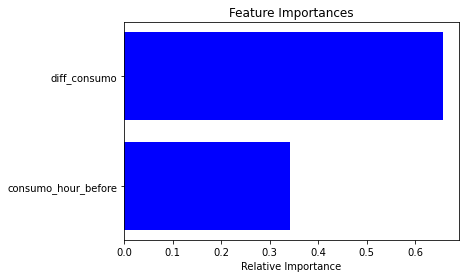

In [25]:
imp = best_model_RF.feature_importances_
features = X_train.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

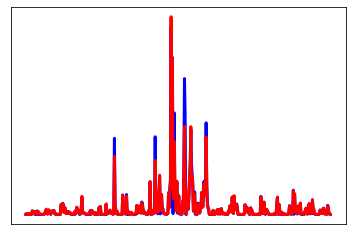

In [26]:
plt.plot(y_test.values, color='blue', linewidth=3)
plt.plot(y_pred_test, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [27]:
reg=LinearRegression()
tscv = TimeSeriesSplit(n_splits=5)
cross_reg = cross_val_score(reg, X_train, y_train, cv=tscv, scoring='r2')

In [28]:
cross_reg.mean()

0.999999999999835

In [29]:
reg.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred_test=reg.predict(X_test)

In [31]:
regression_results(y_test, y_pred_test)

explained_variance:  1.0
MAE:  0.0
MSE:  0.0
mean_squared_log_error:  0.0
RMSE:  0.0
r2:  1.0


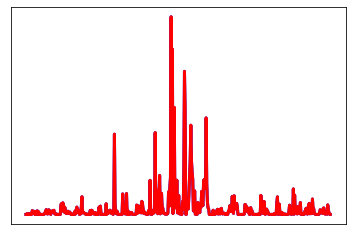

In [32]:
plt.plot(y_test.values, color='blue', linewidth=3)
plt.plot(y_pred_test, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [67]:
X_train= co_ss_FD.loc[: "2021-03-27 23:00", ["ordinal_datetime"]]

In [72]:
y_train=co_ss_FD.loc[:"2021-03-27 23:00", "consumo_escl"]

In [69]:
X_test= co_ss_FD.loc["2021-03-28 00:00": , ["ordinal_escl"]]

In [73]:
y_test= co_ss_FD.loc["2021-03-28 00:00":, "consumo_escl"]

LR: -0.389010 (0.593666)


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached

SGD: -1169670123872862566546758267472078347131944960.000000 (1476094574059138693441441719586915877300207616.000000)
NN: -0.404773 (0.672388)
KNN: -0.339240 (0.264418)
DT: -0.490827 (0.707110)
RF: -0.524298 (0.788176)
SVR: -384.551178 (543.446089)


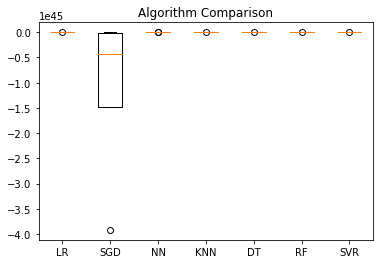

In [76]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('SGD', SGDRegressor()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('DT', DecisionTreeRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=5)
    
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [77]:
from sklearn.model_selection import GridSearchCV
RF = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=RF, cv=tscv, param_grid=param_search, scoring = "r2")
gsearch.fit(X_train, y_train)
best_score_RF = gsearch.best_score_
best_model_RF = gsearch.best_estimator_

In [78]:
y_pred_test=best_model_RF.predict(X_test)

In [79]:
regression_results(y_test, y_pred_test)

explained_variance:  -0.0
MAE:  0.0038
MSE:  0.0001
mean_squared_log_error:  0.0001
RMSE:  0.0109
r2:  -0.0401


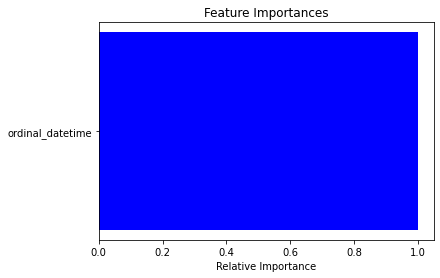

In [80]:
imp = best_model_RF.feature_importances_
features = X_train.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

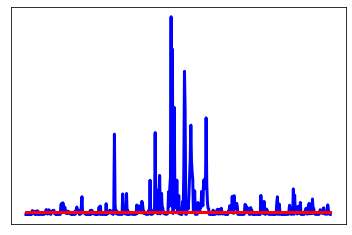

In [81]:
plt.plot(y_test.values, color='blue', linewidth=3)
plt.plot(y_pred_test, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()